# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# Read the data and see the columns,values

In [2]:

df= pd.read_csv("2019.csv")
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 10.4+ KB


In [4]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [5]:
df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [6]:
# Country Topped the Rankings
top_country = df[df["Overall rank"] == 1]["Country or region"].iloc[0]
print("Country that Topped the Rankings:", top_country)


Country that Topped the Rankings: Finland


In [7]:
# Print top 10 countries
top_10_countries = df.nsmallest(10, "Overall rank")
print("Top 10 Countries:")
print(top_10_countries[["Overall rank", "Country or region"]])

Top 10 Countries:
   Overall rank Country or region
0             1           Finland
1             2           Denmark
2             3            Norway
3             4           Iceland
4             5       Netherlands
5             6       Switzerland
6             7            Sweden
7             8       New Zealand
8             9            Canada
9            10           Austria


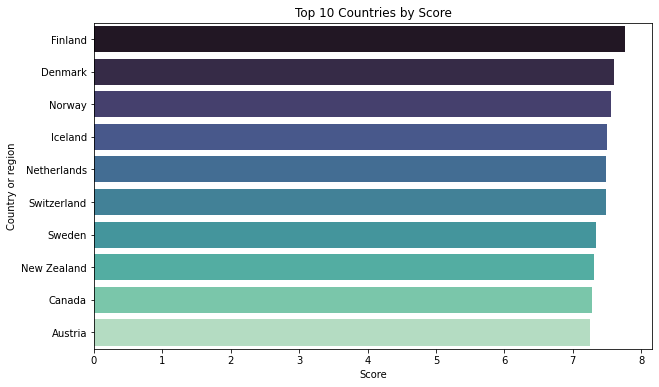

In [8]:
# Bar Plot: Top 10 Countries by Score
top_10_countries = df.nlargest(10, 'Score')
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_countries, x='Score', y='Country or region', palette='mako')
plt.title('Top 10 Countries by Score')
plt.xlabel('Score')
plt.ylabel('Country or region')
plt.show()

In [9]:
# Print lowest 10 countries
lowest_10_countries = df.nlargest(10, "Overall rank")
print("Lowest 10 Countries:")
print(lowest_10_countries[["Overall rank", "Country or region"]])

Lowest 10 Countries:
     Overall rank         Country or region
155           156               South Sudan
154           155  Central African Republic
153           154               Afghanistan
152           153                  Tanzania
151           152                    Rwanda
150           151                     Yemen
149           150                    Malawi
148           149                     Syria
147           148                  Botswana
146           147                     Haiti


In [10]:
# Country with Lowest Happiness Score
lowest_country = df[df["Score"] == df["Score"].min()]["Country or region"].iloc[0]
print("Country with Lowest Happiness Score:", lowest_country)

Country with Lowest Happiness Score: South Sudan


In [11]:
# Correlation between GDP per Capita and Happiness
gdp_happiness_correlation = df["GDP per capita"].corr(df["Score"])
print("Correlation between GDP per Capita and Happiness:", gdp_happiness_correlation)


Correlation between GDP per Capita and Happiness: 0.7938828678781276


In [12]:
# Sort by Healthy life expectancy in descending order
highest_life_expectancy = df.sort_values(by="Healthy life expectancy", ascending=False)

# Print countries with the highest life expectancy
print("Countries with the Highest Life Expectancy:")
print(highest_life_expectancy[["Country or region", "Healthy life expectancy"]].head())

Countries with the Highest Life Expectancy:
   Country or region  Healthy life expectancy
33         Singapore                    1.141
75         Hong Kong                    1.122
57             Japan                    1.088
29             Spain                    1.062
5        Switzerland                    1.052


In [13]:

# Iterate through columns
for column in df.columns:
    if column != "Country or region":
        max_country = df[df[column] == df[column].max()]["Country or region"].iloc[0]
        print(f"Country with Highest {column}: {max_country}")

Country with Highest Overall rank: South Sudan
Country with Highest Score: Finland
Country with Highest GDP per capita: Qatar
Country with Highest Social support: Iceland
Country with Highest Healthy life expectancy: Singapore
Country with Highest Freedom to make life choices: Uzbekistan
Country with Highest Generosity: Myanmar
Country with Highest Perceptions of corruption: Singapore


In [14]:
# Iterate through columns
for column in df.columns:
    if column != "Country or region":
        min_country = df[df[column] == df[column].min()]["Country or region"].iloc[0]
        print(f"Country with Lowest {column}: {min_country}")

Country with Lowest Overall rank: Finland
Country with Lowest Score: South Sudan
Country with Lowest GDP per capita: Somalia
Country with Lowest Social support: Central African Republic
Country with Lowest Healthy life expectancy: Swaziland
Country with Lowest Freedom to make life choices: Afghanistan
Country with Lowest Generosity: Greece
Country with Lowest Perceptions of corruption: Moldova


# Label Encoding


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
le.fit_transform(df["Country or region"])
df["Country or region"]=le.fit_transform(df["Country or region"])
df



,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,43,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,36,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,105,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,57,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,98,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,117,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,137,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,0,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,24,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [17]:
# Key Factors for Happiness Score
correlation_matrix = df.corr()
key_factors = correlation_matrix["Score"].sort_values(ascending=False)
print("Key Factors for Happiness Score:")
print(key_factors)

Key Factors for Happiness Score:
Score                           1.000000
GDP per capita                  0.793883
Healthy life expectancy         0.779883
Social support                  0.777058
Freedom to make life choices    0.566742
Perceptions of corruption       0.385613
Generosity                      0.075824
Country or region              -0.023039
Overall rank                   -0.989096
Name: Score, dtype: float64


In [18]:
# Calculate correlations between Score and other factors
correlation_factors = df.corr()["Score"].sort_values(ascending=False)

# Print factors that could help improve the happiness score
positive_correlations = correlation_factors[correlation_factors > 0]
print("Factors that Could Help Improve the Happiness Score:")
print(positive_correlations)

Factors that Could Help Improve the Happiness Score:
Score                           1.000000
GDP per capita                  0.793883
Healthy life expectancy         0.779883
Social support                  0.777058
Freedom to make life choices    0.566742
Perceptions of corruption       0.385613
Generosity                      0.075824
Name: Score, dtype: float64


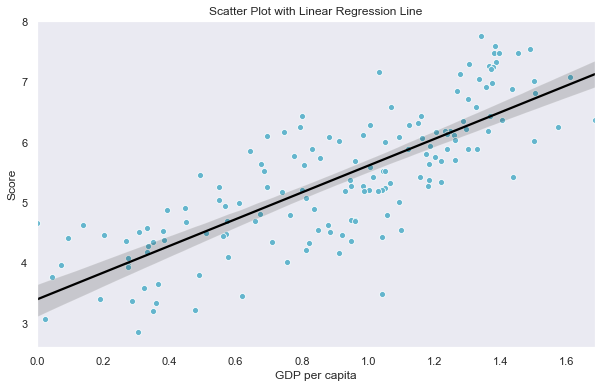

In [19]:
# Scatter plot with linear regression line
sns.set(style="dark")  # Set the style for the plot
plt.figure(figsize=(10, 6))  # Set the size of the figure

# Plot the scatter plot
sns.scatterplot(x="GDP per capita", y="Score", data=df, color='c')

# Fit and plot the linear regression line
sns.regplot(x="GDP per capita", y="Score", data=df, scatter=False, color='black')

plt.title('Scatter Plot with Linear Regression Line')
plt.xlabel('GDP per capita')
plt.ylabel('Score')

plt.show()

# Split the data

In [20]:
# Separate features (X) and target variable (y)
x = df.drop(['Overall rank', 'Country or region', 'Score'], axis=1)
y = df['Score']

# Apply the train test model

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.75,random_state=156)

print('shape of x_train', x_train.shape)

print('shape of y_train', y_train.shape)

print('shape of x_test', x_test.shape)

print('shape of y_test', y_test.shape)

shape of x_train (39, 6)
shape of y_train (39,)
shape of x_test (117, 6)
shape of y_test (117,)


# Using Standard Scaler to fit xtrain and xtest

In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

# Applying Linear Regression

In [23]:

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [24]:
lr.coef_

array([0.55057569, 0.37562288, 0.07415685, 0.04617152, 0.09922965,
       0.11180717])

In [25]:
lr.intercept_

5.559769230769231

In [26]:
x_test[0, :]

array([-1.47223434, -1.12602454, -2.04826527, -0.90305161,  0.81210758,
       -0.74285159])

In [27]:
lr.predict([x_test[0, :]])

array([4.13017305])

In [28]:
lr.predict(x_test)

array([4.13017305, 4.70394944, 6.35373053, 5.7121755 , 5.05992963,
       5.05456822, 5.80112616, 6.77563804, 4.54346081, 5.3986176 ,
       5.50618541, 6.42611848, 4.39137173, 3.66423705, 5.53325867,
       4.54054438, 6.86520839, 7.10773863, 6.34337134, 4.83030748,
       6.9505655 , 6.95857065, 5.38732124, 5.76366544, 5.57930706,
       5.41141619, 4.52782354, 6.18067586, 4.43315726, 6.14597723,
       6.16537417, 5.88535206, 6.42854516, 5.99299421, 6.1175247 ,
       5.00548995, 6.06329701, 5.47432181, 7.00576404, 4.73910327,
       5.81853099, 4.46349996, 5.56587582, 5.85516064, 5.44564387,
       5.10313427, 5.64772279, 5.89543827, 5.35770959, 5.4134891 ,
       4.49873601, 5.96425895, 6.80124501, 5.75421663, 5.72261296,
       5.46258841, 5.76980091, 6.15847308, 4.20639551, 4.36166561,
       7.34334467, 5.71548406, 5.9894101 , 7.06449915, 3.91637819,
       4.15564277, 6.18580591, 5.06344672, 5.550116  , 4.8393836 ,
       4.96330027, 6.06916259, 6.26525015, 5.12351303, 5.74454

In [29]:
y_test

128    4.374
152    3.231
29     6.354
129    4.366
123    4.461
       ...  
101    4.883
92     5.191
15     7.021
20     6.825
96     5.011
Name: Score, Length: 117, dtype: float64

In [30]:
lr.score(x_test, y_test)

0.7154254302147128

# Finding MSE,RMSE and R2

In [31]:
y_pred = lr.predict(x_test)

In [32]:
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(rmse)

0.3497462545425173
0.5913934853737546


In [33]:
from sklearn.metrics import r2_score

In [34]:
r2_score(y_test,y_pred)

0.7154254302147128

# Multiple Linear Regression

In [35]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [36]:
# Apply standard scaling to the feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [37]:
# Applying Multiple Linear Regression
mlr = LinearRegression()
mlr.fit(x_train_scaled, y_train)

LinearRegression()

In [38]:

# Predicting on the test set
y_pred = mlr.predict(x_test_scaled)

In [39]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 0.34974625454251723
Root Mean Squared Error: 0.5913934853737546
R-squared: 0.7154254302147129


# Applying Ridge and Lasso  

In [40]:
# Separate features (X) and target variable (y)
x = df.drop(['Score'], axis=1)
y = df['Score']

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.55,random_state=101)

In [42]:
from sklearn.linear_model import Ridge, Lasso

#ridge function has an alpha argument we will generate an array of alpha values ranging from very big to very small

In [43]:
rd=Ridge()
rd.fit(x_train,y_train)
rd.score(x_test,y_test)

0.9766001989451677

In [44]:
rd2=Ridge(alpha=2)
rd2.fit(x_train,y_train)
rd2.score(x_test,y_test)

0.9761751099527398

In [45]:
ls=Lasso()
ls.fit(x_train,y_train)
ls.score(x_test,y_test)

0.9760097528230024

In [46]:
ls=Lasso(alpha=2)
ls.fit(x_train,y_train)
ls.score(x_test,y_test)

0.9765313445471999

# Lasso Regression- Prediction


In [47]:
lasso_model = Lasso().fit(x_train,y_train)

In [48]:
lasso_model

Lasso()

In [49]:
lasso_model.predict(x_train)[0:5]

array([6.79704564, 3.79788438, 4.37312333, 6.56087738, 6.44791164])

In [50]:
lasso_model.predict(x_test)[0:5]

array([5.36120037, 4.72877761, 4.47274998, 4.14128578, 6.50369357])

In [51]:
y_pred = lasso_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.1568672092684595

In [52]:
r2_score(y_test,y_pred)

0.9760097528230024

# Ridge Regression - Prediction


In [53]:
ridge_model = Ridge().fit(x_train,y_train)

In [54]:
y_pred = ridge_model.predict(x_train)

In [55]:
print("predict: ", y_pred[0:10])
print("real: ", y_train[0:10].values)

predict:  [6.74033408 3.76725582 4.3928798  6.55520846 6.43883554 4.18885611
 4.50920127 4.43620459 6.6555513  5.02602481]
real:  [6.825 3.775 4.509 6.321 6.223 4.36  4.628 4.534 6.446 5.175]


In [56]:
RMSE = np.mean(mean_squared_error(y_train,y_pred)) # rmse = square root of the mean of error squares
print("train error: ", RMSE)

train error:  0.023990490902215972


In [57]:
# test error
y_pred = ridge_model.predict(x_test)
RMSE = np.mean(mean_squared_error(y_test,y_pred))
print("test error: ", RMSE)

test error:  0.024001687839482203


# Random Forest Regression

In [58]:
x=df.drop('Score',axis=1)
y=df['Score']
print('shape of x',x.shape)
print('shape of y',y.shape)

shape of x (156, 8)
shape of y (156,)


In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.85,random_state=196)

print('shape of x_train', x_train.shape)

print('shape of y_train', y_train.shape)

print('shape of x_test', x_test.shape)

print('shape of y_test', y_test.shape)

shape of x_train (23, 8)
shape of y_train (23,)
shape of x_test (133, 8)
shape of y_test (133,)


In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
regressor=RandomForestRegressor(n_estimators=100,criterion='mse')
regressor.fit(x_train, y_train)

RandomForestRegressor()

In [62]:
regressor.score(x_test,y_test)

0.9091835797705924

In [63]:
regressor_100=RandomForestRegressor(n_estimators=500,criterion='mse')
regressor_100.fit(x_train,y_train)

RandomForestRegressor(n_estimators=500)

In [64]:
regressor_100.score(x_test,y_test)

0.9130217343172805

In [65]:
x_test.iloc[-1, :]

Overall rank                    146.000
Country or region               155.000
GDP per capita                    0.366
Social support                    1.114
Healthy life expectancy           0.433
Freedom to make life choices      0.361
Generosity                        0.151
Perceptions of corruption         0.089
Name: 145, dtype: float64

In [66]:
regressor.predict([x_test.iloc[-1, :]])

array([4.17515])

In [67]:
y_test.iloc[-1]

3.6630000000000003

In [68]:
y_pred=regressor.predict(x_test)
y_pred

array([6.94865, 5.88609, 4.71054, 5.12629, 5.3134 , 6.84586, 4.21405,
       4.96634, 5.26099, 6.34999, 6.9042 , 5.11054, 5.43684, 6.44545,
       6.54679, 5.60133, 5.31825, 5.8706 , 4.94472, 6.63493, 4.58497,
       4.48872, 4.56651, 4.18208, 4.71032, 6.92815, 6.12789, 5.86665,
       6.60728, 5.12612, 5.13414, 6.25101, 4.52133, 4.43509, 4.00178,
       5.0312 , 3.96956, 5.13974, 6.28453, 6.34729, 4.48173, 6.80578,
       5.91725, 5.83059, 5.9346 , 6.8551 , 6.77095, 6.21876, 6.4576 ,
       4.45509, 5.89052, 4.73708, 6.70117, 4.00856, 5.58395, 4.43966,
       6.08536, 6.56012, 4.86483, 5.78026, 4.12395, 4.55169, 5.51751,
       4.12395, 4.68935, 6.08992, 4.39071, 6.06171, 5.10348, 4.39493,
       4.10765, 5.48532, 6.57275, 5.98389, 4.65865, 6.09979, 5.9805 ,
       4.20206, 6.43165, 5.97735, 5.01396, 4.49008, 4.21841, 4.52739,
       4.56646, 4.2621 , 5.68601, 6.49459, 6.24059, 4.15256, 5.16403,
       6.13795, 5.4435 , 4.80151, 4.67112, 4.44694, 6.27412, 6.1211 ,
       4.12914, 4.77

In [69]:
y_test

5      7.480
61     5.758
108    4.700
87     5.211
81     5.287
       ...  
141    3.973
44     6.105
93     5.175
47     6.070
145    3.663
Name: Score, Length: 133, dtype: float64

# Data Visualization

In [70]:
#import the libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df=df.drop(columns="Country or region",axis=1)

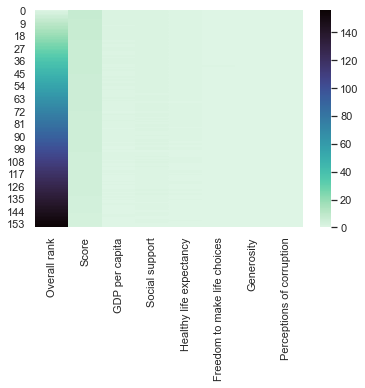

In [72]:
sns.heatmap(df, cmap='mako_r')

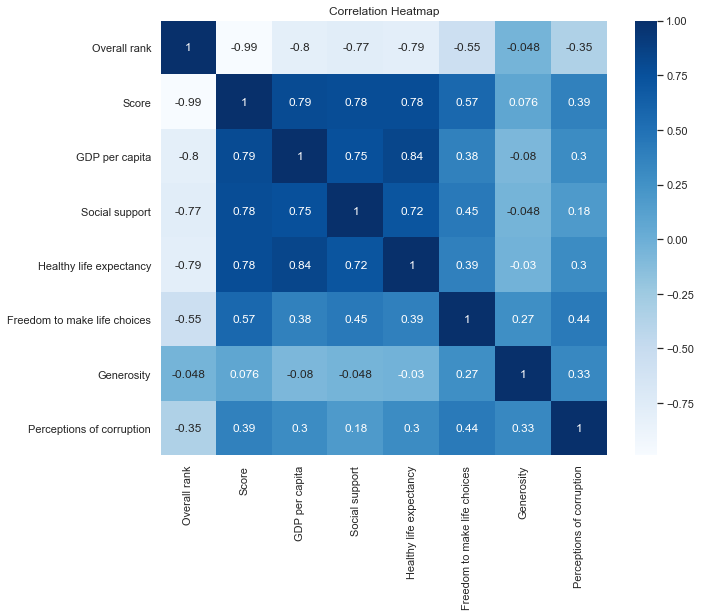

In [73]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

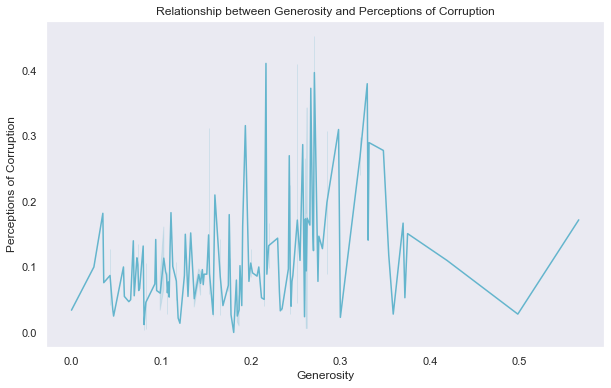

In [74]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="Generosity", y="Perceptions of corruption", data=df, color='c')
plt.title("Relationship between Generosity and Perceptions of Corruption")
plt.xlabel("Generosity")
plt.ylabel("Perceptions of Corruption")
plt.show()

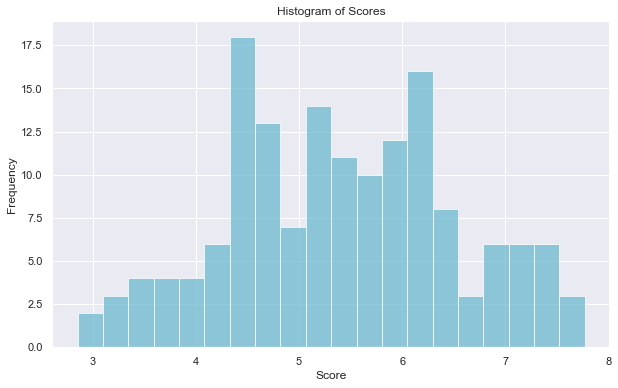

In [75]:
# Create a histogram for the 'Score' column
plt.figure(figsize=(10, 6))
plt.hist(df["Score"], bins=20, color='c', alpha=0.7)
plt.title("Histogram of Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0A568EE0>,
      dtype=object)

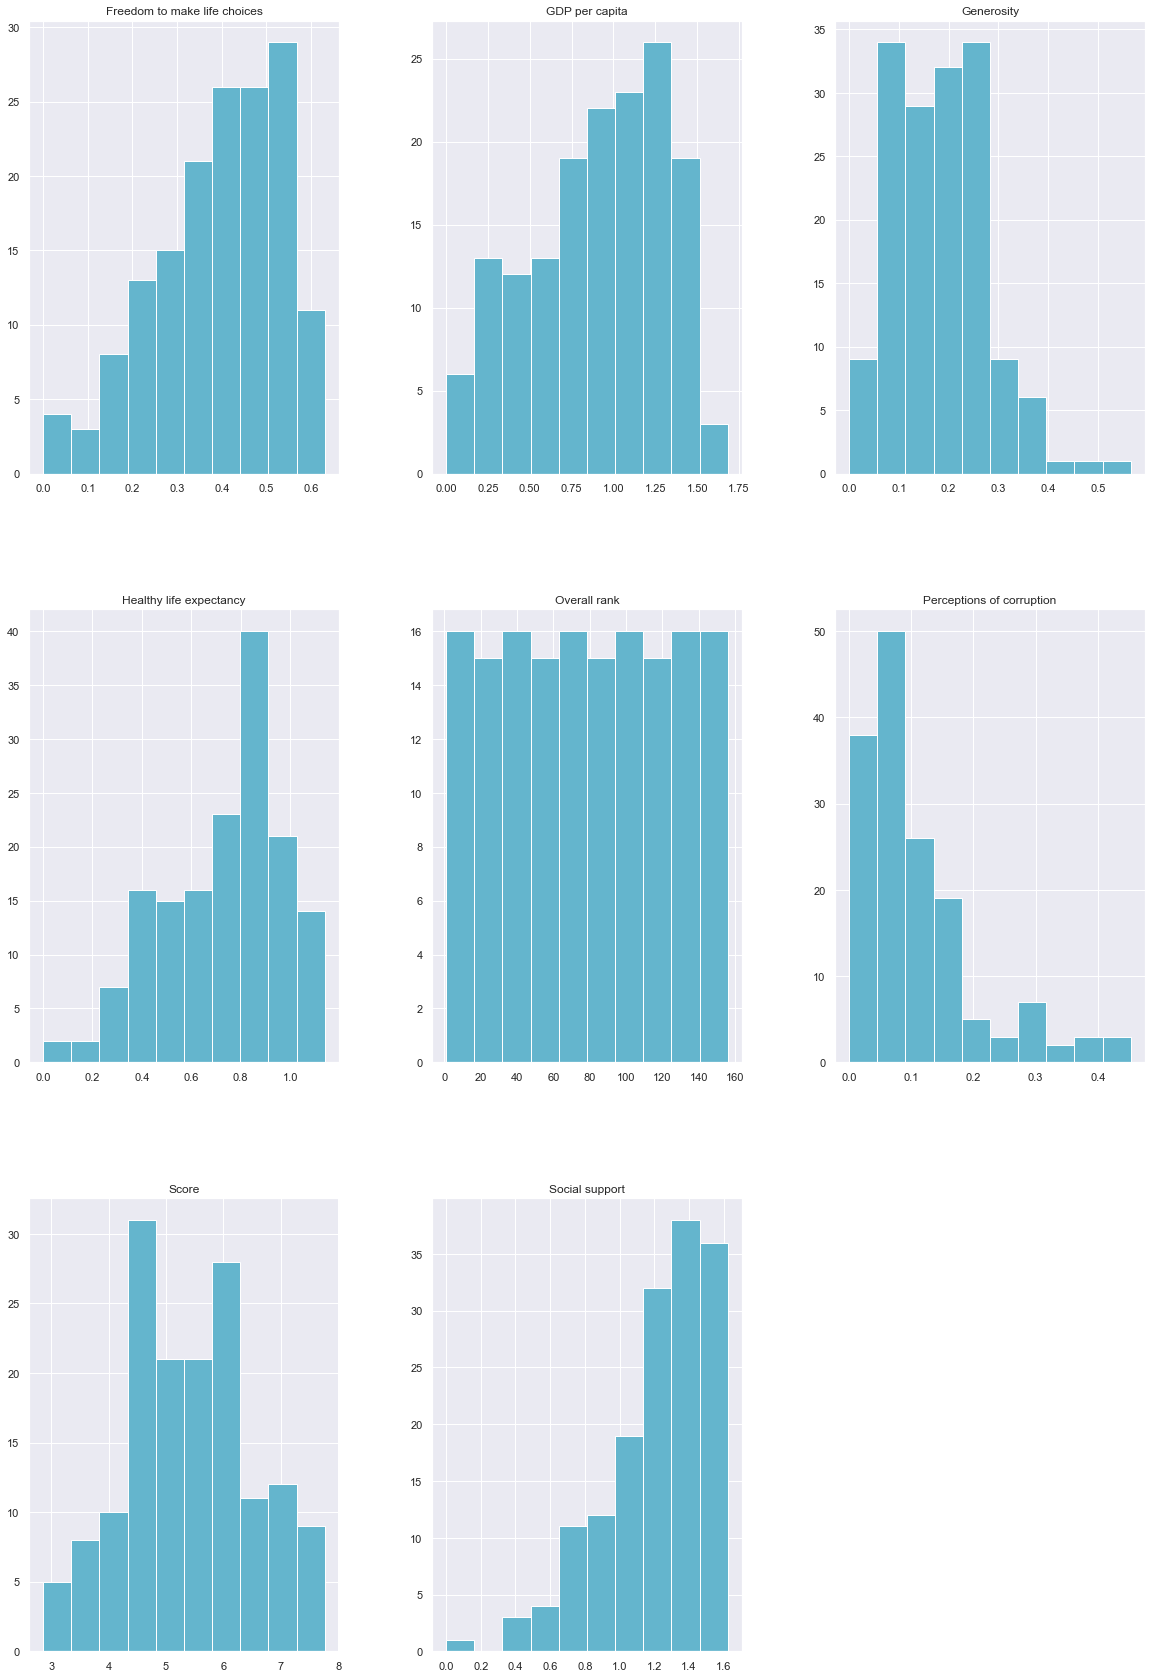

In [76]:
df.hist(figsize=(20,30),color='c')

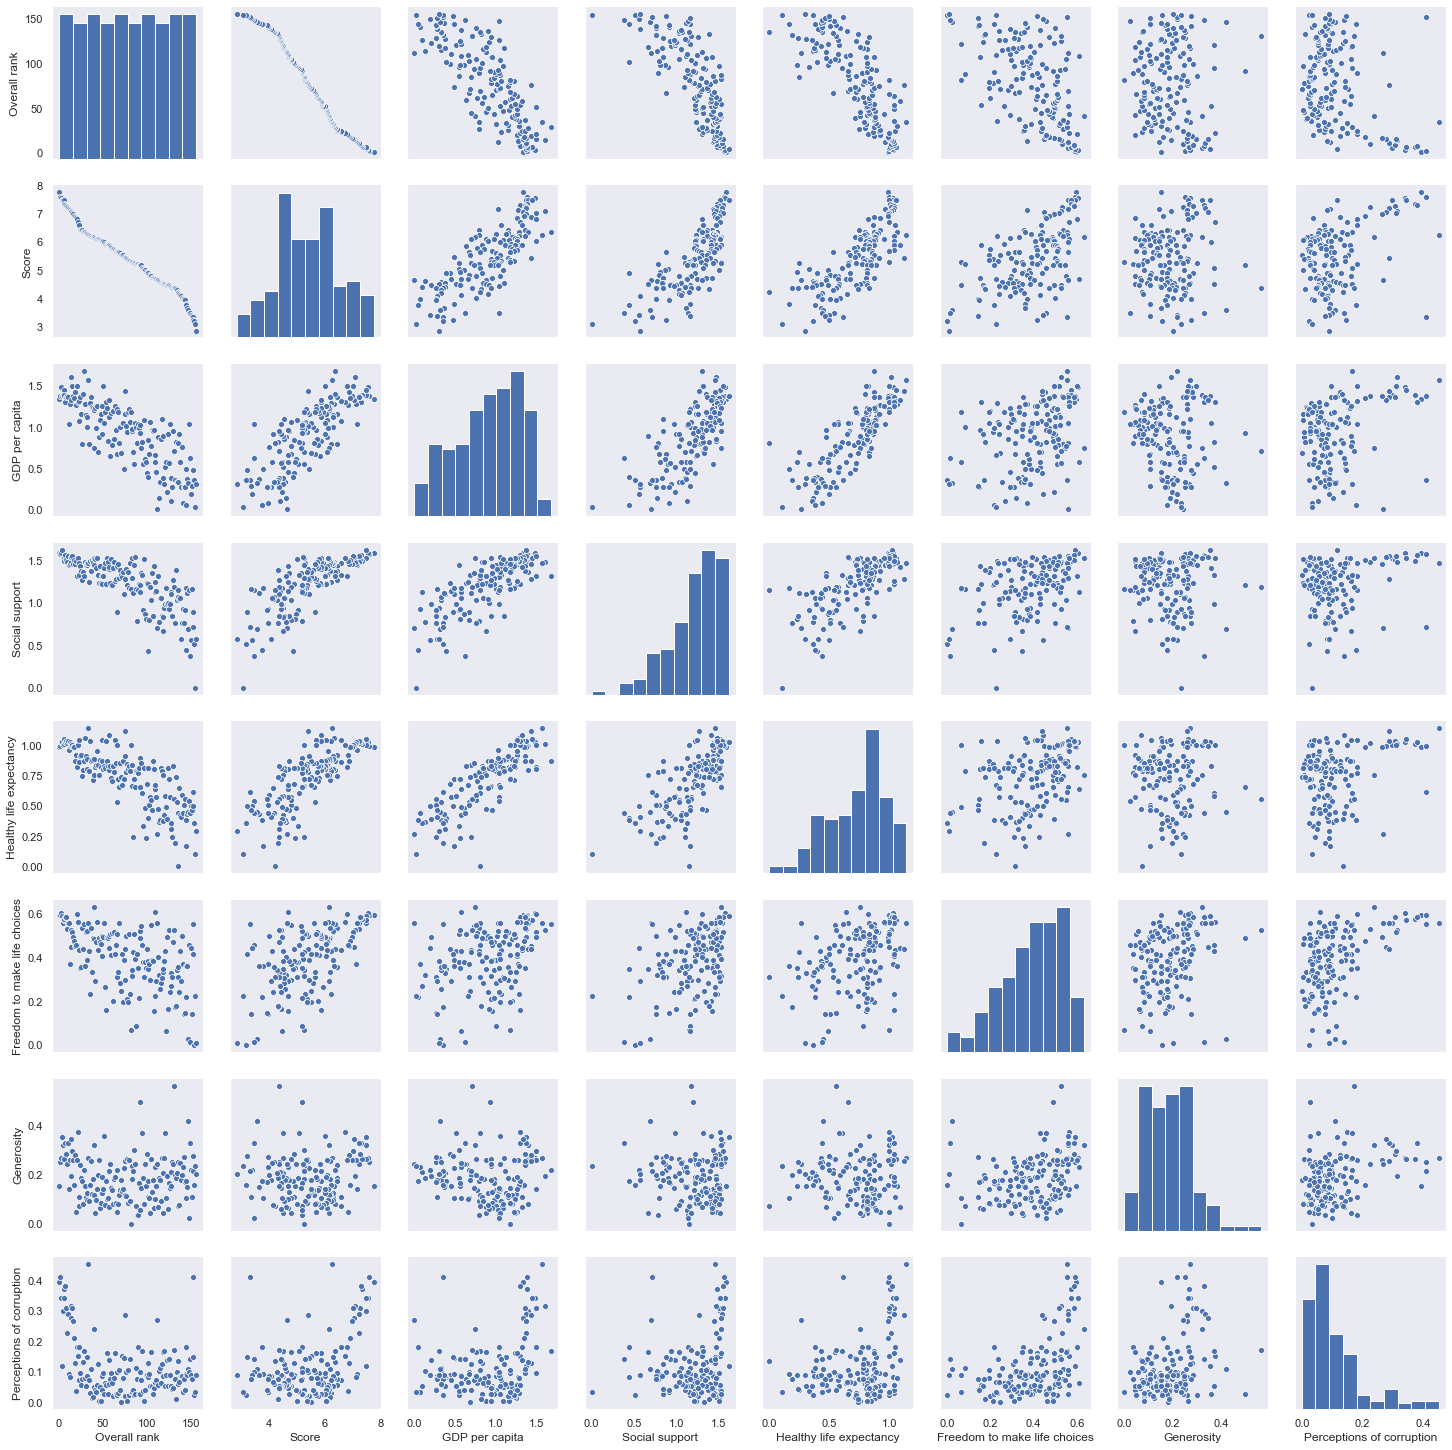

In [77]:
sns.pairplot(df, palette='Set1')

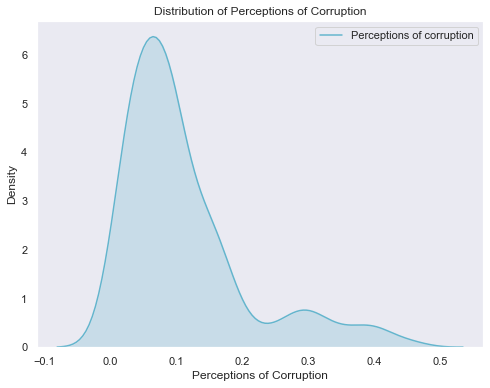

In [78]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df["Perceptions of corruption"], color="c", shade='True')
plt.title("Distribution of Perceptions of Corruption")
plt.xlabel("Perceptions of Corruption")
plt.ylabel("Density")
plt.show()